In [1]:
import pandas as pd

In [3]:
white_stats = pd.read_csv('./data/white_stats.csv', index_col=0)
params_df = pd.read_csv('./processed_df.csv', index_col=0)

In [9]:
white_stats['patient_id'] = white_stats['0'].apply(lambda x: '-'.join(x.replace('/mnt/d/uczelnia/magister/TCGA_breast_patch/', '').split('-')[0:3]))

In [12]:
white_stats.head()

,0,1,2,3,patient_id
0,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.999701,50161,50176,TCGA-3C-AAAU
1,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.000000,0,50176,TCGA-3C-AAAU
2,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.000020,1,50176,TCGA-3C-AAAU
3,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.000000,0,50176,TCGA-3C-AAAU
4,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.000060,3,50176,TCGA-3C-AAAU


In [16]:
df = white_stats.join(params_df['SUBTYPE'], 'patient_id', how='inner')
df.rename(columns={'0': 'path', '1': 'percentage'}, inplace=True)

In [17]:
df.head()

,path,percentage,2,3,patient_id,SUBTYPE
1502,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.00000,0,50176,TCGA-3C-AALI,hr+her2+
1503,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.00002,1,50176,TCGA-3C-AALI,hr+her2+
1504,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.00000,0,50176,TCGA-3C-AALI,hr+her2+
1505,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.00000,0,50176,TCGA-3C-AALI,hr+her2+
1506,/mnt/d/uczelnia/magister/TCGA_breast_patch/TCG...,0.00000,0,50176,TCGA-3C-AALI,hr+her2+


In [22]:
filtered_df = df[df['percentage'] <= 0.2]

<Axes: xlabel='SUBTYPE'>

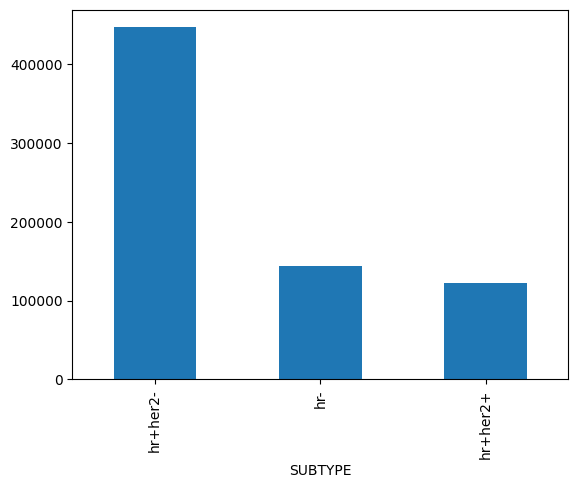

In [23]:
filtered_df['SUBTYPE'].value_counts().plot.bar()

In [32]:
filtered_df.rename(columns={'path': 'file_name', 'SUBTYPE': 'label'})[['file_name', 'label']].to_csv('/mnt/d/uczelnia/magister/TCGA_breast_patch/metadata.csv')